## Step1. import packages

In [ ]:
from scipy import io 
import pandas as pd
import numpy as np
import os
import sys
import shutil
import glob
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision.utils
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import csv
%matplotlib inline

## Step2. Data prepocessing
* Only need to be executed at the first time, since we have run it before so we comment the code.

### 2-1. unzip file fist

In [ ]:
# import zipfile
# with zipfile.ZipFile('./data/archive.zip', 'r') as zf:
#     zf.extractall('./data')

### 2-2. find all datas xmin, ymin, xmax, ymax in CSV and combine it into one CSV file

In [ ]:
# mycsvdir = './data/archive/dataset'
# csvfiles = glob.glob(os.path.join(mycsvdir, '*.csv'))

# dataframes = []  
# for csvfile in csvfiles:
#     df = pd.read_csv(csvfile)
#     dataframes.append(df)

### 2-3. do the panda concat here

In [ ]:
# result = pd.concat(dataframes, ignore_index=True)

### 2-4. Drop the column we don't need

In [ ]:
# result.drop('width', inplace=True, axis=1)
# result.drop('height', inplace=True, axis=1)
# result.drop('xmin', inplace=True, axis=1)
# result.drop('ymin', inplace=True, axis=1)
# result.drop('xmax', inplace=True, axis=1)
# result.drop('ymax', inplace=True, axis=1)

# Put it into a csv file: optional
# result.to_csv('all.csv', index=False)

In [ ]:
all_df = pd.read_csv("./all.csv")
all_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,000106393cfe2343888c584e65fd2274,3520,2514,F16,1,1,1796,1451
1,0003f56298fa8999168d7988a2e9549d,4046,2697,F22,213,505,3550,1623
2,0003f56298fa8999168d7988a2e9549d,4046,2697,F22,460,563,4046,1817
3,000aa01b25574f28b654718db0700f72,2048,1365,F35,852,177,1998,503
4,000aa01b25574f28b654718db0700f72,2048,1365,JAS39,169,769,549,893
...,...,...,...,...,...,...,...,...
13864,ffa8d739b58bbf6b65e6d5dd9b2e8a69,1800,1177,B1,108,417,1720,738
13865,ffb6242b673e9f46948ab15a05f983f4,4096,2725,C17,1535,740,2927,1810
13866,ffca28378a5df5113d498f59ed282a98,1244,960,F16,2,91,1234,687
13867,ffec16860f43fa96b27ff39bac99709b,1536,2048,C130,553,833,757,906


### 2-5. Split the data for train, valid and test here

In [ ]:
train_df, test_df = train_test_split(all_df, test_size=0.3, random_state=0)
train_df, valid_df = train_test_split(train_df, test_size=0.1, random_state=0)
train_df

,filename,width,height,class,xmin,ymin,xmax,ymax
6858,8118895beab0d1039b8c7c23819a11cb,1280,914,V22,742,719,1060,835
8617,a0a447a023fe8e5b102cb17f36979f2f,5174,3449,MQ9,401,2063,3386,2742
2872,3618454e7b614fa5086dbf537dd64e18,1777,1317,EF2000,640,822,867,1169
4728,5af83ca81fade1c87b799fcc1ce88a94,1812,1248,F18,40,56,1760,1204
805,101a5dc8b7a0104d99ee019a9930f8d9,1820,1006,J20,1,103,1790,815
...,...,...,...,...,...,...,...,...
3911,4a97b523701f259541584e877749fd5d,4096,2825,C5,1993,1264,2435,1514
5930,714f66d230677a6687004764d998e5ea,3264,2448,V22,530,961,1527,1289
9453,aef371309e5d20f481de5e56b7a62ed2,4031,2687,EF2000,1743,924,1788,970
10745,c63ae96d05c500d4ab9806f3ae58e122,2048,1365,F35,1085,420,1771,984


### 2-6  check file for train, test, and valid

In [ ]:
# train
def check_file(filename):
    if not os.path.isfile(f"./train/{filename}.jpg"):
        return None
    return filename

train_df.filename = train_df.filename.apply(check_file)
train_df.dropna(inplace=True)
train_df

,filename,width,height,class,xmin,ymin,xmax,ymax
6858,8118895beab0d1039b8c7c23819a11cb,1280,914,V22,742,719,1060,835
8617,a0a447a023fe8e5b102cb17f36979f2f,5174,3449,MQ9,401,2063,3386,2742
2872,3618454e7b614fa5086dbf537dd64e18,1777,1317,EF2000,640,822,867,1169
4728,5af83ca81fade1c87b799fcc1ce88a94,1812,1248,F18,40,56,1760,1204
805,101a5dc8b7a0104d99ee019a9930f8d9,1820,1006,J20,1,103,1790,815
...,...,...,...,...,...,...,...,...
3911,4a97b523701f259541584e877749fd5d,4096,2825,C5,1993,1264,2435,1514
5930,714f66d230677a6687004764d998e5ea,3264,2448,V22,530,961,1527,1289
9453,aef371309e5d20f481de5e56b7a62ed2,4031,2687,EF2000,1743,924,1788,970
10745,c63ae96d05c500d4ab9806f3ae58e122,2048,1365,F35,1085,420,1771,984


In [ ]:
#@title Validation
def check_file(filename):
    if not os.path.isfile(f"./valid/{filename}.jpg"):
        return None
    return filename

valid_df.filename = valid_df.filename.apply(check_file)
valid_df.dropna(inplace=True)

In [ ]:
#@title Test
def check_file(filename):
    if not os.path.isfile(f"./test/{filename}.jpg"):
        return None
    return filename

test_df.filename = test_df.filename.apply(check_file)
test_df.dropna(inplace=True)

### 2-7. convert train, valid, and test dataframe into csv and save it to our folder

In [ ]:
train_df.to_csv('train.csv', index=True)
valid_df.to_csv('valid.csv', index=True)
test_df.to_csv('test.csv', index=True)

## Step3 Building data
- If we want to continue training, we just need to run the code below:

### 3-1. Read train, valid, and test csv file

In [ ]:
train_df = pd.read_csv('train.csv')
valid_df = pd.read_csv('valid.csv')
test_df = pd.read_csv('test.csv')

### 3-2. Do the label encoder
- for example, if there are three classes(A, B, C) they will be (1, 2, 3)

In [ ]:
le = LabelEncoder()
train_df['class'] = le.fit_transform(train_df['class'])
valid_df['class'] = le.fit_transform(valid_df['class'])
test_df['class'] = le.fit_transform(test_df['class'])

### 3-3. Seperate data to train, valid, and test folder
- this only need to be run at the first time to separate the dataset into train, valid, and test

In [ ]:
# images_dir = "./data/dataset"
# for row in train_df.iterrows():
#     try:
#         os.rename(f"{images_dir}/{row[1]['filename']}.jpg", f"./train/{row[1]['filename']}.jpg")
#     except:
#         continue
# for row in valid_df.iterrows():
#     try:
#         os.rename(f"{images_dir}/{row[1]['filename']}.jpg", f"./valid/{row[1]['filename']}.jpg")
#     except:
#         continue
# for row in test_df.iterrows():
#     try:
#         os.rename(f"{images_dir}/{row[1]['filename']}.jpg", f"./test/{row[1]['filename']}.jpg")
#     except:
#         continue

### 3-4. Do the customdataset
- In CustomDataset class we define three functions, init, len, and getitem function
    - _init_ : Initialize paths, transforms, dataframe, and so on
    - _len_ : Indicate the total size of the dataset
    - _getitem_ :
        1. Read from file (using numpy.fromfile, PIL.Image.open)
        2. Preprocess the data (torchvision.Transform).
        3. Return the data (e.g. image and label)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self): # return the len
        return(len(self.dataframe))
    
    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        image_path = os.path.join(os.getcwd(), self.root_dir, row['filename']+'.jpg')
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.IMREAD_COLOR)
        label = row['class']
        crop_img = image[row['ymin']:row['ymax'], row['xmin']:row['xmax']]
        return (self.transform(crop_img), np.longlong(label))

### 3-5. Do the data augmentation

In [ ]:
custom_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((380, 380)),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

### 3-6. Load Data
- load train, valid, and test data

In [ ]:
batch_size = 64
train_dataset = CustomDataset(train_df, "train", custom_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                        shuffle=True, num_workers=0)

valid_dataset = CustomDataset(valid_df, "valid", custom_transforms)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size,
                        shuffle=True, num_workers=0)

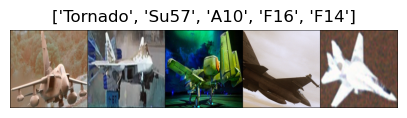

In [ ]:
#@title Show image
def imshow(img, title):
    img = torchvision.utils.make_grid(img, normalize=True)
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.axis('off')
    plt.show()
    
images, labels = next(iter(train_loader))
imshow(images[:5], [le.classes_[int(i)] for i in labels[:5]])

### 3-7. Build model (use tranfer learning)
- we use efficientnet_b4 model

In [ ]:
model = models.efficientnet_b4(pretrained=True)
model

D:\anaconda3\envs\pytorch-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anaconda3\envs\pytorch-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
# model.aux_logits = False
for parameter in model.parameters():
    parameter.requires_grad = False
model.classifier[1] = nn.Linear(in_features=1792, out_features=40, bias=True)

In [ ]:
model = model.cuda()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

## Step4 Start training

### 4-1. Load model
- we don't need to run this phase at frist time, because at first we don't have any model

In [ ]:
checkpoint = torch.load("./Checkpoints/latest.pt")
model.load_state_dict(checkpoint)

<All keys matched successfully>

### 4-2. Start training
- we checked our loss each 5 times
- If we find greater epochs, we will save it but not recover it.

In [ ]:
end_epoch = 180
best_accuracy = 0
for epoch in range(start_epoch, end_epoch+1):
    total_batch = len(train_dataset)//batch_size
    model.train()
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.cuda()
        Y = batch_labels.cuda()

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 5 == 0:
            print('Epoch [%d/%d], lter [%d/%d] Loss: %.4f'
                 %(epoch+1, end_epoch, i+1, total_batch, cost.item()))
    
    model.eval()
    correct = 0
    total = 0

    for images, labels in valid_loader:
        images = images.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels.cuda()).sum()
    accuracy = (100 * float(correct) / total)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        print(accuracy)
        torch.save({'model': model.state_dict(), 'start_epoch': epoch}, f'./Checkpoints/epoch{epoch}_accuracy{accuracy}.h5')

Epoch [101/180], lter [5/136] Loss: 1.4964
Epoch [101/180], lter [10/136] Loss: 1.3451
Epoch [101/180], lter [15/136] Loss: 1.1863
Epoch [101/180], lter [20/136] Loss: 1.3393
Epoch [101/180], lter [25/136] Loss: 1.3726
Epoch [101/180], lter [30/136] Loss: 1.4542
Epoch [101/180], lter [35/136] Loss: 1.4147
Epoch [101/180], lter [40/136] Loss: 1.2857
Epoch [101/180], lter [45/136] Loss: 1.6931
Epoch [101/180], lter [50/136] Loss: 1.3713
Epoch [101/180], lter [55/136] Loss: 1.4233
Epoch [101/180], lter [60/136] Loss: 0.9566
Epoch [101/180], lter [65/136] Loss: 1.2906
Epoch [101/180], lter [70/136] Loss: 1.4473
Epoch [101/180], lter [75/136] Loss: 1.2408
Epoch [101/180], lter [80/136] Loss: 1.2707
Epoch [101/180], lter [85/136] Loss: 1.7991
Epoch [101/180], lter [90/136] Loss: 1.5738
Epoch [101/180], lter [95/136] Loss: 1.6675
Epoch [101/180], lter [100/136] Loss: 1.2401
Epoch [101/180], lter [105/136] Loss: 1.3095
Epoch [101/180], lter [110/136] Loss: 1.1539
Epoch [101/180], lter [115/136

Epoch [107/180], lter [120/136] Loss: 1.1548
Epoch [107/180], lter [125/136] Loss: 1.1481
Epoch [107/180], lter [130/136] Loss: 1.3290
Epoch [107/180], lter [135/136] Loss: 1.1265
Epoch [108/180], lter [5/136] Loss: 1.1937
Epoch [108/180], lter [10/136] Loss: 1.0163
Epoch [108/180], lter [15/136] Loss: 1.1464
Epoch [108/180], lter [20/136] Loss: 1.2781
Epoch [108/180], lter [25/136] Loss: 1.3152
Epoch [108/180], lter [30/136] Loss: 1.3647
Epoch [108/180], lter [35/136] Loss: 1.0253
Epoch [108/180], lter [40/136] Loss: 1.2731
Epoch [108/180], lter [45/136] Loss: 1.3314
Epoch [108/180], lter [50/136] Loss: 1.2201
Epoch [108/180], lter [55/136] Loss: 1.3583
Epoch [108/180], lter [60/136] Loss: 1.0370
Epoch [108/180], lter [65/136] Loss: 1.3666
Epoch [108/180], lter [70/136] Loss: 0.8629
Epoch [108/180], lter [75/136] Loss: 1.3285
Epoch [108/180], lter [80/136] Loss: 1.2591
Epoch [108/180], lter [85/136] Loss: 1.2269
Epoch [108/180], lter [90/136] Loss: 0.8718
Epoch [108/180], lter [95/136

Epoch [114/180], lter [105/136] Loss: 0.9209
Epoch [114/180], lter [110/136] Loss: 0.9457
Epoch [114/180], lter [115/136] Loss: 1.0620
Epoch [114/180], lter [120/136] Loss: 1.0572
Epoch [114/180], lter [125/136] Loss: 0.8542
Epoch [114/180], lter [130/136] Loss: 1.4979
Epoch [114/180], lter [135/136] Loss: 0.8266
Epoch [115/180], lter [5/136] Loss: 1.0994
Epoch [115/180], lter [10/136] Loss: 0.7777
Epoch [115/180], lter [15/136] Loss: 0.9400
Epoch [115/180], lter [20/136] Loss: 0.9610
Epoch [115/180], lter [25/136] Loss: 1.0222
Epoch [115/180], lter [30/136] Loss: 0.9427
Epoch [115/180], lter [35/136] Loss: 0.9539
Epoch [115/180], lter [40/136] Loss: 0.9964
Epoch [115/180], lter [45/136] Loss: 0.9370
Epoch [115/180], lter [50/136] Loss: 1.2518
Epoch [115/180], lter [55/136] Loss: 1.1617
Epoch [115/180], lter [60/136] Loss: 1.2081
Epoch [115/180], lter [65/136] Loss: 1.0249
Epoch [115/180], lter [70/136] Loss: 1.3207
Epoch [115/180], lter [75/136] Loss: 0.9883
Epoch [115/180], lter [80/

Epoch [121/180], lter [85/136] Loss: 0.8464
Epoch [121/180], lter [90/136] Loss: 1.1985
Epoch [121/180], lter [95/136] Loss: 0.9641
Epoch [121/180], lter [100/136] Loss: 0.9999
Epoch [121/180], lter [105/136] Loss: 0.8677
Epoch [121/180], lter [110/136] Loss: 0.9734
Epoch [121/180], lter [115/136] Loss: 0.9855
Epoch [121/180], lter [120/136] Loss: 0.6098
Epoch [121/180], lter [125/136] Loss: 0.8576
Epoch [121/180], lter [130/136] Loss: 0.9435
Epoch [121/180], lter [135/136] Loss: 0.9908
Epoch [122/180], lter [5/136] Loss: 1.1388
Epoch [122/180], lter [10/136] Loss: 0.8432
Epoch [122/180], lter [15/136] Loss: 0.9818
Epoch [122/180], lter [20/136] Loss: 1.0737
Epoch [122/180], lter [25/136] Loss: 1.0073
Epoch [122/180], lter [30/136] Loss: 1.1148
Epoch [122/180], lter [35/136] Loss: 1.1096
Epoch [122/180], lter [40/136] Loss: 0.9151
Epoch [122/180], lter [45/136] Loss: 0.9978
Epoch [122/180], lter [50/136] Loss: 0.9313
Epoch [122/180], lter [55/136] Loss: 0.8877
Epoch [122/180], lter [60

Epoch [128/180], lter [70/136] Loss: 0.9401
Epoch [128/180], lter [75/136] Loss: 1.0392
Epoch [128/180], lter [80/136] Loss: 0.9894
Epoch [128/180], lter [85/136] Loss: 0.9422
Epoch [128/180], lter [90/136] Loss: 0.8086
Epoch [128/180], lter [95/136] Loss: 0.9678
Epoch [128/180], lter [100/136] Loss: 0.8711
Epoch [128/180], lter [105/136] Loss: 0.9144
Epoch [128/180], lter [110/136] Loss: 1.2131
Epoch [128/180], lter [115/136] Loss: 0.9425
Epoch [128/180], lter [120/136] Loss: 1.1174
Epoch [128/180], lter [125/136] Loss: 0.8706
Epoch [128/180], lter [130/136] Loss: 1.0423
Epoch [128/180], lter [135/136] Loss: 1.0629
61.2
Epoch [129/180], lter [5/136] Loss: 1.3620
Epoch [129/180], lter [10/136] Loss: 0.9580
Epoch [129/180], lter [15/136] Loss: 0.9466
Epoch [129/180], lter [20/136] Loss: 0.8820
Epoch [129/180], lter [25/136] Loss: 1.0965
Epoch [129/180], lter [30/136] Loss: 1.3654
Epoch [129/180], lter [35/136] Loss: 1.1590
Epoch [129/180], lter [40/136] Loss: 0.8067
Epoch [129/180], lte

Epoch [135/180], lter [50/136] Loss: 0.8240
Epoch [135/180], lter [55/136] Loss: 0.9125
Epoch [135/180], lter [60/136] Loss: 0.9316
Epoch [135/180], lter [65/136] Loss: 0.9321
Epoch [135/180], lter [70/136] Loss: 0.8997
Epoch [135/180], lter [75/136] Loss: 0.9607
Epoch [135/180], lter [80/136] Loss: 1.0947
Epoch [135/180], lter [85/136] Loss: 0.9826
Epoch [135/180], lter [90/136] Loss: 0.8742
Epoch [135/180], lter [95/136] Loss: 1.0423
Epoch [135/180], lter [100/136] Loss: 0.7457
Epoch [135/180], lter [105/136] Loss: 1.1055
Epoch [135/180], lter [110/136] Loss: 1.1230
Epoch [135/180], lter [115/136] Loss: 0.7808
Epoch [135/180], lter [120/136] Loss: 1.0386
Epoch [135/180], lter [125/136] Loss: 0.7326
Epoch [135/180], lter [130/136] Loss: 1.0764
Epoch [135/180], lter [135/136] Loss: 0.9725
61.4
Epoch [136/180], lter [5/136] Loss: 0.9877
Epoch [136/180], lter [10/136] Loss: 0.7333
Epoch [136/180], lter [15/136] Loss: 0.8434
Epoch [136/180], lter [20/136] Loss: 0.8137
Epoch [136/180], lte

Epoch [142/180], lter [30/136] Loss: 0.9502
Epoch [142/180], lter [35/136] Loss: 0.7728
Epoch [142/180], lter [40/136] Loss: 0.8237
Epoch [142/180], lter [45/136] Loss: 1.0092
Epoch [142/180], lter [50/136] Loss: 0.9408
Epoch [142/180], lter [55/136] Loss: 0.6314
Epoch [142/180], lter [60/136] Loss: 0.7757
Epoch [142/180], lter [65/136] Loss: 0.5671
Epoch [142/180], lter [70/136] Loss: 0.9722
Epoch [142/180], lter [75/136] Loss: 0.9578
Epoch [142/180], lter [80/136] Loss: 0.7864
Epoch [142/180], lter [85/136] Loss: 1.0376
Epoch [142/180], lter [90/136] Loss: 1.0057
Epoch [142/180], lter [95/136] Loss: 1.0089
Epoch [142/180], lter [100/136] Loss: 0.7776
Epoch [142/180], lter [105/136] Loss: 0.8242
Epoch [142/180], lter [110/136] Loss: 0.7701
Epoch [142/180], lter [115/136] Loss: 1.0400
Epoch [142/180], lter [120/136] Loss: 0.8537
Epoch [142/180], lter [125/136] Loss: 0.9793
Epoch [142/180], lter [130/136] Loss: 0.8148
Epoch [142/180], lter [135/136] Loss: 0.7091
Epoch [143/180], lter [5

Epoch [149/180], lter [10/136] Loss: 0.9381
Epoch [149/180], lter [15/136] Loss: 1.2506
Epoch [149/180], lter [20/136] Loss: 0.8821
Epoch [149/180], lter [25/136] Loss: 1.1141
Epoch [149/180], lter [30/136] Loss: 1.1330
Epoch [149/180], lter [35/136] Loss: 0.7313
Epoch [149/180], lter [40/136] Loss: 0.8357
Epoch [149/180], lter [45/136] Loss: 0.8149
Epoch [149/180], lter [50/136] Loss: 1.1234
Epoch [149/180], lter [55/136] Loss: 0.8095
Epoch [149/180], lter [60/136] Loss: 0.9649
Epoch [149/180], lter [65/136] Loss: 0.8009
Epoch [149/180], lter [70/136] Loss: 1.0380
Epoch [149/180], lter [75/136] Loss: 0.9495
Epoch [149/180], lter [80/136] Loss: 0.8389
Epoch [149/180], lter [85/136] Loss: 0.9996
Epoch [149/180], lter [90/136] Loss: 0.6890
Epoch [149/180], lter [95/136] Loss: 0.8861
Epoch [149/180], lter [100/136] Loss: 0.9262
Epoch [149/180], lter [105/136] Loss: 0.8613
Epoch [149/180], lter [110/136] Loss: 0.7431
Epoch [149/180], lter [115/136] Loss: 0.7252
Epoch [149/180], lter [120/1

Epoch [155/180], lter [130/136] Loss: 0.9796
Epoch [155/180], lter [135/136] Loss: 1.0076
Epoch [156/180], lter [5/136] Loss: 0.9363
Epoch [156/180], lter [10/136] Loss: 0.8372
Epoch [156/180], lter [15/136] Loss: 0.8528
Epoch [156/180], lter [20/136] Loss: 0.7213
Epoch [156/180], lter [25/136] Loss: 0.7510
Epoch [156/180], lter [30/136] Loss: 0.8730
Epoch [156/180], lter [35/136] Loss: 0.9113
Epoch [156/180], lter [40/136] Loss: 0.8281
Epoch [156/180], lter [45/136] Loss: 0.8254
Epoch [156/180], lter [50/136] Loss: 0.7522
Epoch [156/180], lter [55/136] Loss: 0.9485
Epoch [156/180], lter [60/136] Loss: 1.0177
Epoch [156/180], lter [65/136] Loss: 0.9885
Epoch [156/180], lter [70/136] Loss: 0.8254
Epoch [156/180], lter [75/136] Loss: 0.7937
Epoch [156/180], lter [80/136] Loss: 0.7378
Epoch [156/180], lter [85/136] Loss: 1.1123
Epoch [156/180], lter [90/136] Loss: 0.8547
Epoch [156/180], lter [95/136] Loss: 0.7927
Epoch [156/180], lter [100/136] Loss: 0.8195
Epoch [156/180], lter [105/136

Epoch [162/180], lter [115/136] Loss: 0.8775
Epoch [162/180], lter [120/136] Loss: 0.7991
Epoch [162/180], lter [125/136] Loss: 0.8055
Epoch [162/180], lter [130/136] Loss: 0.7817
Epoch [162/180], lter [135/136] Loss: 0.9297
Epoch [163/180], lter [5/136] Loss: 0.7696
Epoch [163/180], lter [10/136] Loss: 0.9602
Epoch [163/180], lter [15/136] Loss: 0.8978
Epoch [163/180], lter [20/136] Loss: 0.8845
Epoch [163/180], lter [25/136] Loss: 0.7048
Epoch [163/180], lter [30/136] Loss: 0.8573
Epoch [163/180], lter [35/136] Loss: 0.8184
Epoch [163/180], lter [40/136] Loss: 0.8079
Epoch [163/180], lter [45/136] Loss: 1.0244
Epoch [163/180], lter [50/136] Loss: 0.8313
Epoch [163/180], lter [55/136] Loss: 0.7136
Epoch [163/180], lter [60/136] Loss: 0.8687
Epoch [163/180], lter [65/136] Loss: 0.9640
Epoch [163/180], lter [70/136] Loss: 1.0773
Epoch [163/180], lter [75/136] Loss: 0.9509
Epoch [163/180], lter [80/136] Loss: 0.8036
Epoch [163/180], lter [85/136] Loss: 1.0321
Epoch [163/180], lter [90/13

Epoch [169/180], lter [100/136] Loss: 0.7668
Epoch [169/180], lter [105/136] Loss: 0.7498
Epoch [169/180], lter [110/136] Loss: 0.8659
Epoch [169/180], lter [115/136] Loss: 0.9716
Epoch [169/180], lter [120/136] Loss: 0.6765
Epoch [169/180], lter [125/136] Loss: 0.6236
Epoch [169/180], lter [130/136] Loss: 0.6331
Epoch [169/180], lter [135/136] Loss: 0.9194
Epoch [170/180], lter [5/136] Loss: 0.8768
Epoch [170/180], lter [10/136] Loss: 1.0289
Epoch [170/180], lter [15/136] Loss: 0.9920
Epoch [170/180], lter [20/136] Loss: 0.7555
Epoch [170/180], lter [25/136] Loss: 0.8059
Epoch [170/180], lter [30/136] Loss: 0.8152
Epoch [170/180], lter [35/136] Loss: 1.1439
Epoch [170/180], lter [40/136] Loss: 0.8865
Epoch [170/180], lter [45/136] Loss: 0.9669
Epoch [170/180], lter [50/136] Loss: 0.8351
Epoch [170/180], lter [55/136] Loss: 1.1757
Epoch [170/180], lter [60/136] Loss: 0.8015
Epoch [170/180], lter [65/136] Loss: 0.6731
Epoch [170/180], lter [70/136] Loss: 0.8507
Epoch [170/180], lter [75

KeyboardInterrupt: 

### 4-3. save the last time model
- we save the model here so we can continue to train it next time

In [ ]:
torch.save({'model': model.state_dict(), 'start_epoch': end_epoch}, './Checkpoints/latest1.pt')

In [ ]:
checkpoint = torch.load('./Checkpoints/latest1.pt')
checkpoint

{'model': OrderedDict([('features.0.0.weight',
               tensor([[[[ 2.1534e-01, -1.6255e-01,  3.7162e-03],
                         [ 3.6903e-01,  8.0982e-01,  1.0435e+00],
                         [-2.1097e-01, -5.0213e-01,  2.1145e-01]],
               
                        [[ 4.4556e-01, -1.0516e-01, -3.9820e-01],
                         [ 5.5751e-01,  9.7086e-01,  1.3903e+00],
                         [-1.5556e-01,  1.4589e-01,  7.2926e-01]],
               
                        [[ 1.8679e-01, -2.7480e-01,  1.0834e-01],
                         [ 2.0350e-01,  4.5107e-01,  4.9518e-01],
                         [ 7.5508e-02, -4.1912e-01,  1.5237e-01]]],
               
               
                       [[[-1.5609e-01,  9.0662e-01, -6.9338e-01],
                         [-4.7089e+00,  4.2829e+00,  1.4501e-01],
                         [-4.2095e-01,  1.3788e+00, -5.7431e-01]],
               
                        [[-1.5333e-01,  1.3208e+00, -8.0091e-01],
          

### 4-4. load the model
- here we want to load the best model that we have trained

In [ ]:
checkpoint = torch.load('./Checkpoints/latest1.pt')
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

In [ ]:
test_dataset = CustomDataset(test_df, "test", custom_transforms)
test_loader = DataLoader(test_dataset, 
                         batch_size=batch_size,
                         shuffle=True)

### 4-5. try some test data and find its accuracy

In [ ]:
model.eval()

correct = 0
total = 0

for images, labels in test_loader:
    
    images = images.cuda()
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

## Step5. Predict
### Input  & Output
1. Input:
    - bounding box in PASCAL VOC format (xmin, ymin, xmax, ymax)
    - 40 aircraft types
        (A10, A400M, AG600, AV8B, B1, B2, B52 Be200, C130, C17, C5, E2, EF2000, F117, F14,
        F15, F16, F18, F22, F35, F4, J20, JAS39, MQ9, Mig31, Mirage2000, RQ4, Rafale, SR71(may
        contain A12), Su34, Su57, Tornado, Tu160, Tu95(may contain Tu142), U2, US2, V22,
        Vulcan, XB70, YF23)
2. Output:
    - group{id}.csv
    - An output data with one predict label.

### 5-1. load model

In [ ]:
model.load_state_dict(torch.load('./Checkpoints/epoch95_accuracy63.13645621181263.h5'))

<All keys matched successfully>

### 5-2. make predict function

In [ ]:
def predict(filename, xmin, ymin, xmax, ymax, model, root_dir):
    image_path = os.path.join(root_dir, filename +'.jpg')  # 
    image = cv2.imread(image_path)
    crop_img = image[ymin:ymax, xmin:xmax]
    image = custom_transforms(crop_img).cuda()
    image = image.unsqueeze(0)
    result = model(image)
    result = torch.max(result.data, 1)[1]
    result = le.classes_[result]
    print(filename)
    print(result)
    return filename, result

In [ ]:
custom_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((380, 380)),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

### 5-3 read test csv file

In [ ]:
df = pd.read_excel("./classifier_data/test2/test.xlsx")
df

,Unnamed: 0,filename,width,height,class,xmin,ymin,xmax,ymax
0,6858,8118895beab0d1039b8c7c23819a11cb,1280,914,V22,742,719,1060,835
1,8617,a0a447a023fe8e5b102cb17f36979f2f,5174,3449,MQ9,401,2063,3386,2742


### 5-4. put what we need to predict function

In [ ]:
model.eval()
root_dir = './classifier_data/test2/'
filename_list = []
result_list = []
for i in range(len(df)):
    filename = df['filename'][i]
    xmin = df['xmin'][i]
    ymin = df['ymin'][i]
    xmax = df['xmax'][i]
    ymax = df['ymax'][i]
    filename, result = predict(filename, xmin, ymin, xmax, ymax, model, root_dir)
    filename_list.append(filename)
    result_list.append(result)


8118895beab0d1039b8c7c23819a11cb
V22
a0a447a023fe8e5b102cb17f36979f2f
MQ9


### 5-5. zip the predict filename and type

In [ ]:
df = pd.DataFrame(list(zip(filename_list, result_list)), columns=['filename', 'class'])

### 5-6. put the dataframe to csv

In [ ]:
df.to_csv('./classifier_data/test2/group26v2.csv', index=False)

## Step6. Predict the data provided by TA

### 6-1. Do the predict function

In [ ]:
def predict(filename, model, root_dir):
    image_path = os.path.join(root_dir, filename)
    image = cv2.imread(image_path)
    image = custom_transforms(image).cuda()
    image = image.unsqueeze(0)
    result = model(image)
    result = torch.max(result.data, 1)[1]
    result = le.classes_[result]
    print(filename)
    print(result)
    return filename, result

### 6-2. load model

In [ ]:
model.load_state_dict(torch.load('./Checkpoints/epoch95_accuracy63.13645621181263.h5'))

<All keys matched successfully>

In [ ]:
custom_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((380, 380)),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [ ]:
# df = pd.read_excel("./classifier_data/classifier_test/output_team.xlsx")
# df

### 6-3. put what we need to predict function

In [ ]:
model.eval()
filename_list = []
result_list = []
dir_path = './classifier_data/classifier_test/'
for filename in os.listdir(dir_path):
    if filename[-3:] == "jpg":
        filename, result = predict(filename, model, dir_path)
        filename_list.append(filename)
        result_list.append(result)

0001.jpg
A400M
0002.jpg
AV8B
0003.jpg
B2
0004.jpg
C130
0005.jpg
F15
0006.jpg
F16
0007.jpg
F117
0008.jpg
JAS39
0009.jpg
MQ9
0010.jpg
F35


### 6-4. zip the predict filename and type

In [ ]:
df = pd.DataFrame(list(zip(filename_list, result_list)), columns=['filename', 'class'])

### 6-5. put the dataframe to csv

In [ ]:
df.to_csv('./classifier_data/classifier_test/group26.csv', index=False)